In [1]:
#Arrays, matrices, and data:
import pandas as pd

pd.set_option("display.max_rows", None)

#Data visualization:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Handling paths:
from os import chdir

chdir("/home/tiago/Downloads/")

In [2]:
#Parsing the dataset:
wine_data = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

In [3]:
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
#Summary statistics for all countries (in alphabetical order by default):

countries = wine_data.groupby("country")

countries.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [5]:
#Point/price statistics for countries with the five highest average scores:

countries.mean().sort_values(by="points", ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


Text(0, 0.5, 'Number of Wines')

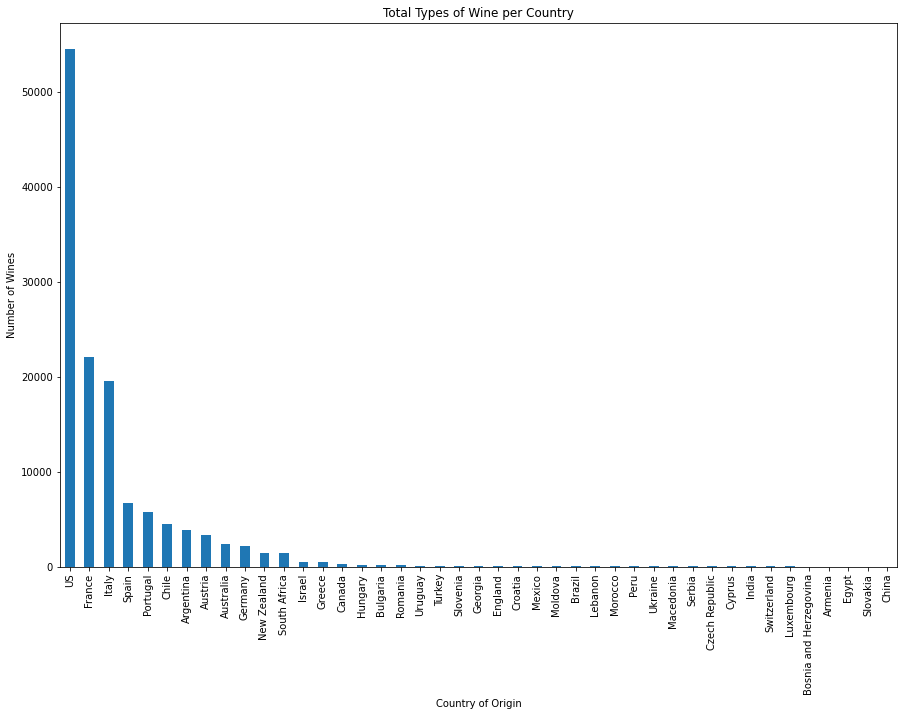

In [6]:
#Plotting a graph to show countries in descending order of total output:

plt.figure(figsize=(15,10))

countries.size().sort_values(ascending=False).plot.bar()

plt.title("Total Types of Wine per Country")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")

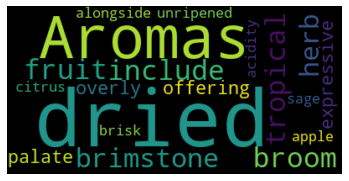

In [7]:
#Generate wordcloud from string, with no optional parameters specified:

text = wine_data.description[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

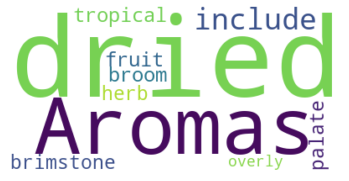

In [8]:
#Same thing, but now with many options specified:

text = wine_data.description[0]

wordcloud = WordCloud(max_font_size=150, max_words=10, background_color="white").generate(text)

#Different methods for interpolation may yield different color palettes and/or smoothness variations.

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
#Save to current working directory:

wordcloud.to_file("first_review.png")

In [10]:
#We now proceed to do the same, but now for a much wider range of wines (in fact, for all of them at once).

full_text = " ".join(description for description in wine_data.description)

unique_count = len(list(set(full_text.split())))

print(f"There are {len(full_text)} words in the full text. {unique_count} of those are unique.")

There are 31661073 words in the full text. 78294 of those are unique.


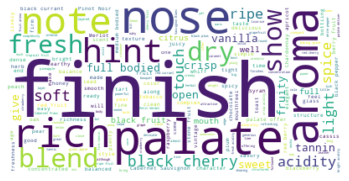

In [11]:
#Stopword list:

stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

#Generating word cloud:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(full_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()